<p align="right"><i>Data Analysis for the Social Sciences - Part II - 2021-11-29</i></p>

# Quantitative Data Analysis

Welcome to Part II of Data Analysis for the Social Sciences. In this stream - Quantitative Data Analysis - we will conduct a range of statistical analyses in order to answer the following research question:

<p><center><i>Is religion associated with differences in sexual attitudes and behaviours among British people?</i></center></p>

### Aims

This lesson - **Multivariate Data Analysis** - has two aims:
1. Demonstrate how to analyse associations when there are three or more variables.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with minimal prior knowledge or experience of quantitative data analysis.
* **Duration**: 45-60 minutes.
* **Pre-requisites**: None.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting multivariate data analysis.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Introduction to multivariate data analysis*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `In []`.**

To execute a cell, click or double-click the cell and press the `Run` button on the top toolbar (you can also use the keyboard shortcut `Shift + Enter`).

Try it for yourself:

In [143]:
name <- readline(prompt="Enter name: ")
print(paste("Hi,", name, "enjoy learning more about R and multivariate analysis!"))

Enter name: Diarmuid
[1] "Hi, Diarmuid enjoy learning more about R and multivariate analysis!"


Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [144]:
x * 5

ERROR: Error in eval(expr, envir, enclos): object 'x' not found


As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [145]:
x <- 10 # create an object called 'x' and give it the value '10'

In [146]:
x * 5 # multiply 'x' by 5

[1] 50

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Introduction to multivariate data analysis

In the [**Bivariate data analysis** lesson](https://github.com/DiarmuidM/data-analysis-for-the-social-sciences-2021/blob/main/lessons/dass-week-10-bivariate-analysis-2021-11-22.ipynb), we learned how to summarise more than one variable at a time, in particular how to assess whether two variables are related. However, quantitative social scientists are fond of saying: it's a multivariate world. That is, there are often many predictors of an outcome, and simply producing lots of bivariate analyses will not capture the complexity and nuance of an outcome. For example, consider the following research question:
* [Is there a difference in the earnings of men and women?](https://doi.org/10.1177%2F0095399716636928)

We can produce an answer to this question by comparing data on hourly pay for men and women. Say we find a difference in earnings:
* Is this the case for all age groups? Or is it really only older men who earn more than older women, and this pattern produces the association between earnings and sex?

Thus in this lesson we will focus on making comparisons using three or more variables of interest. This does not involve any new summary statistics or measures of association; instead we repeat our previous techniques but in the context of more variables: e.g., importance of religion across combinations of age group **and** sex.

Specifically, we will cover the following scenarios:
1. When you have one numeric variable and two categorical variables.
2. When you have two numeric variables and one categorical variable.
3. When you have three categorical variables.

Let's look at some multivariate techniques of analysis using the *Natsal* data.

## Multivariate data analysis in action

### Preliminaries

Let's import the *Natsal* dataset and label the values some of our key variables:

In [147]:
natsal <- read.table("./data/natsal_3_teaching_open.tab", header=TRUE, na="NA", sep="\t")

In [148]:
natsal$agrp <- factor(natsal$agrp, levels = c(1,2,3,4,5,6), labels = c("16-24", "25-34", "35-44", 
                                                                       "45-54", "55-64", "65-74"))

In [149]:
natsal$religimp <- factor(natsal$religimp, levels = c(1,2,3,4,9), labels = c("Very important", "Fairly important", 
                                                                             "Not very important", "Not important at all", "Not answered"))

In [150]:
natsal$rsex <- factor(natsal$rsex, levels = c(1,2), labels = c("Male", "Female"))

In [151]:
natsal$ethnicgrp <- factor(natsal$ethnicgrp, levels = c(1,2,9), labels = c("White", "Non-white", "Not answered"))

### One Numeric and Two Categorical

Let's build up to our multivariate analysis by first showing some univariate and bivariate analyses. Recall the `attconservative` variable is a measure of how conservative a person's attitudies to sex are: scores greater than zero are more conservative, less than zero are more liberal.

In [152]:
summary(natsal$attconservative)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
-3.88938 -0.67900 -0.02177 -0.01728  0.71396  2.59516      299 

In [153]:
sd(natsal$attconservative, na.rm=TRUE)

[1] 1.00745

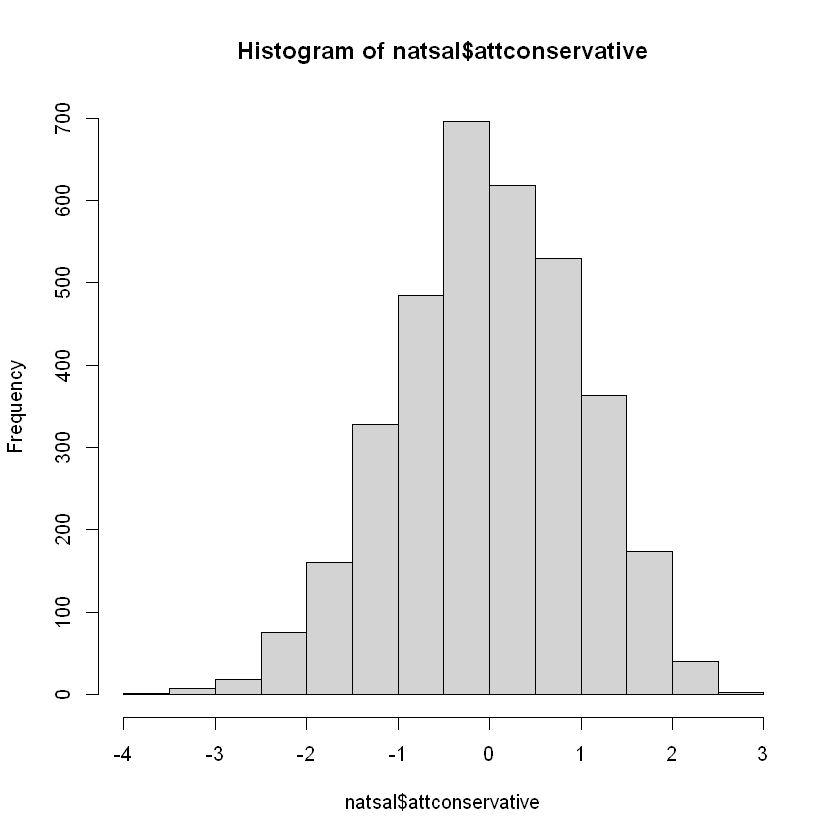

In [154]:
hist(natsal$attconservative)

We see that the average attitude is slightly liberal (less than zero) and that most people are within 1 point of this average.

Now we want to examine whether the average (median) attitude varies by age group or sex.

In [155]:
aggregate(attconservative ~ agrp, data = natsal, median)

agrp,attconservative
<fct>,<dbl>
16-24,-0.11479968
25-34,-0.12259808
35-44,-0.14095068
45-54,0.07900358
55-64,0.27863634
65-74,0.55635821


Perhaps predictably, older respondents are more likely to hold conservative attitudes to sex than younger people, regardless of whether we use the mean or median as our measure of central tendency.

In [156]:
aggregate(attconservative ~ rsex, data = natsal, median)

rsex,attconservative
<fct>,<dbl>
Male,-0.2523686
Female,0.1585522


It appears men are more liberal than women in the attitudes to sex. What might explain this difference? Well perhaps it is something to do with the age of each respondent: that is, perhaps the men who were surveyed are younger than the women, and we know from our previous analysis that younger people are more likely to hold liberal attitudes. 

We can test whether this is the case by examining whether the average (median) attitude varies by age group **AND** sex.

In [157]:
aggregate(attconservative ~ agrp + rsex, data = natsal, median)

agrp,rsex,attconservative
<fct>,<fct>,<dbl>
16-24,Male,-0.2865724337
25-34,Male,-0.3207344149
35-44,Male,-0.4623113268
45-54,Male,-0.2271477851
55-64,Male,-0.0975694990
65-74,Male,0.1740681972
16-24,Female,0.0196729342
25-34,Female,0.0001663143
35-44,Female,-0.0214105373


The above summary table allows us to compare differences between men and women of the same age group. For example, men aged 65-74 are less conservative (.17) than women aged 65-74 (.76). This is true for all age groups. 

This suggests that the difference between men and women is present even when we take into account (control for) age group.

We can examine whether the association between a respondent's sex and their attitude is weaker or stronger across age groups. For example, looking at the summary table it appears that the difference between men and women is particularly stark in the 55-64 age group: men are slightly liberal, women quite conservative. 

Recall that the appropriate measure of association when you have one categorical and one numeric variable is:
* *Eta squared*

This tells us the strength of the association but not the direction (we need to infer this from the summary tables above). *Eta squared* coefficient ranges from 0 to 1, with higher values representing stronger associations.

First let's create separate datasets for each age group (I know, sorry, *R* is a lot of work in this regard):

In [158]:
natsal_16_24 <- natsal[natsal$agrp=="16-24",]
natsal_25_34 <- natsal[natsal$agrp=="25-34",]
natsal_35_44 <- natsal[natsal$agrp=="35-44",]
natsal_45_54 <- natsal[natsal$agrp=="45-54",]
natsal_55_64 <- natsal[natsal$agrp=="55-64",]
natsal_65_74 <- natsal[natsal$agrp=="65-74",]

And now let's calculate our measure of association for each age group.

In [159]:
library(lsr) # import the package containing the `etaSquared()` command

In [160]:
model <- aov(attconservative ~ rsex, data = natsal_16_24)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.03901481,0.03901481


In [161]:
model <- aov(attconservative ~ rsex, data = natsal_25_34)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.02869909,0.02869909


In [162]:
model <- aov(attconservative ~ rsex, data = natsal_35_44)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.04920556,0.04920556


In [163]:
model <- aov(attconservative ~ rsex, data = natsal_45_54)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.04782748,0.04782748


In [164]:
model <- aov(attconservative ~ rsex, data = natsal_55_64)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.1004887,0.1004887


In [165]:
model <- aov(attconservative ~ rsex, data = natsal_65_74)
etaSquared(model)

,eta.sq,eta.sq.part
rsex,0.0693227,0.0693227


Just as we suspected: the association is strongest in the 55-64 age group.

**TASK**: conduct a multivariate analysis of attitude to sex (`attconservative`), respondent's sex (`rsex`) and respondent's ethnicity (`ethnicgrp`).

### Two Numeric and One Categorical

For this section we are going to return to our dataset with median ages of countries around the world and pose the question:
* *Is the median age increasing over time?* AND
* *If so, is this happening across every continent?*

First we import the data and keep observations for continents:

In [166]:
country_ages <- read.csv("./data/median-age-our-world-in-data.csv", header=TRUE, na="NA")
continent_ages <- country_ages[country_ages$Entity=="Africa" | country_ages$Entity=="Asia" | 
                                        country_ages$Entity=="Europe" | country_ages$Entity=="Northern America" |
                                        country_ages$Entity=="Oceania" | country_ages$Entity=="South America",]
head(continent_ages)

,Entity,Code,Year,Age
,<chr>,<chr>,<int>,<dbl>
32,Africa,,1950,19.3
33,Africa,,1955,19.0
34,Africa,,1960,18.6
35,Africa,,1965,18.1
36,Africa,,1970,17.8
37,Africa,,1975,17.6


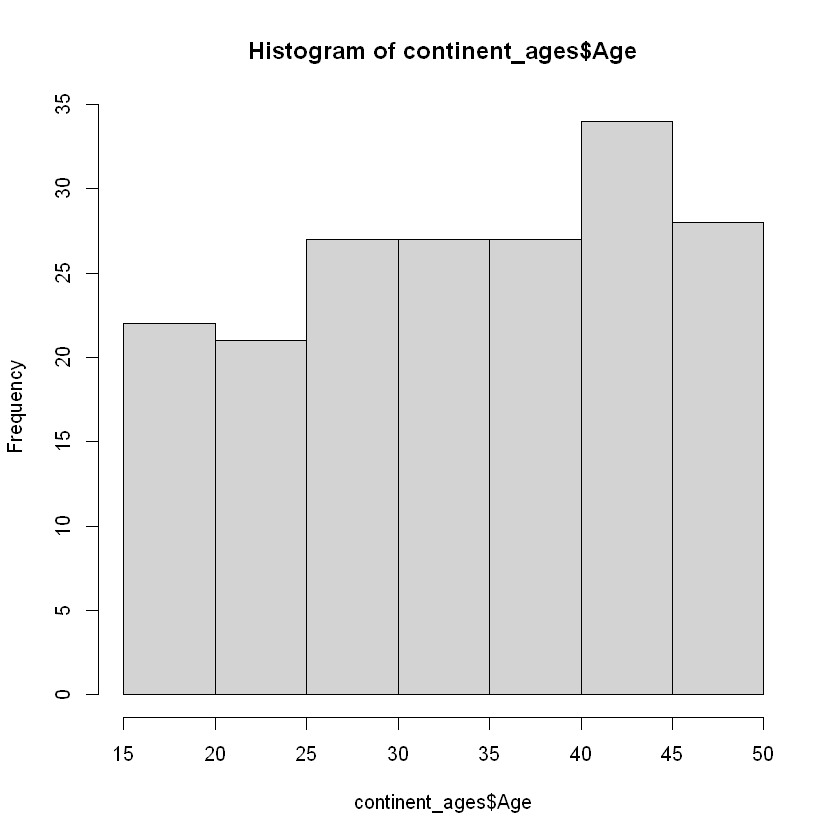

In [167]:
hist(continent_ages$Age)

While it is possible to display two histograms on the same graph, a better way of displaying the joint distribution of two numeric variables is to use a **scatterplot**:

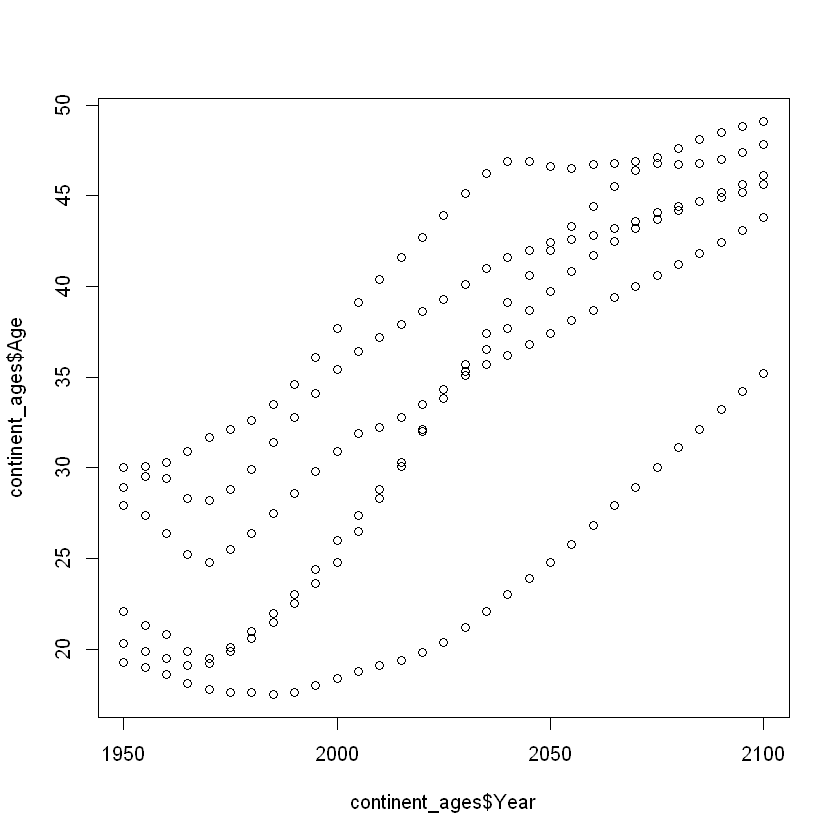

In [168]:
plot(continent_ages$Year, continent_ages$Age) # X variable (axis) is listed first, Y variable (axis) second

There is a clear temporal trend: median age has increased since the 1970s (with the exception of one continent) and is projected to continue doing so until 2100.

Does the joint distribution of median age and year vary across continents? The above graph suggests it does: there are six 'lines' on the graph, one for each continent, even though we just asked *R* to plot two variables. 

Let's be explicit and tell *R* to plot the joint distribution of median age and year for each continent:

In [169]:
library(ggplot2) # specific R package for visualising data

In [170]:
# Define the data and variables to be plotted
p <- ggplot(data = continent_ages, mapping = aes(x = Year, y = Age))

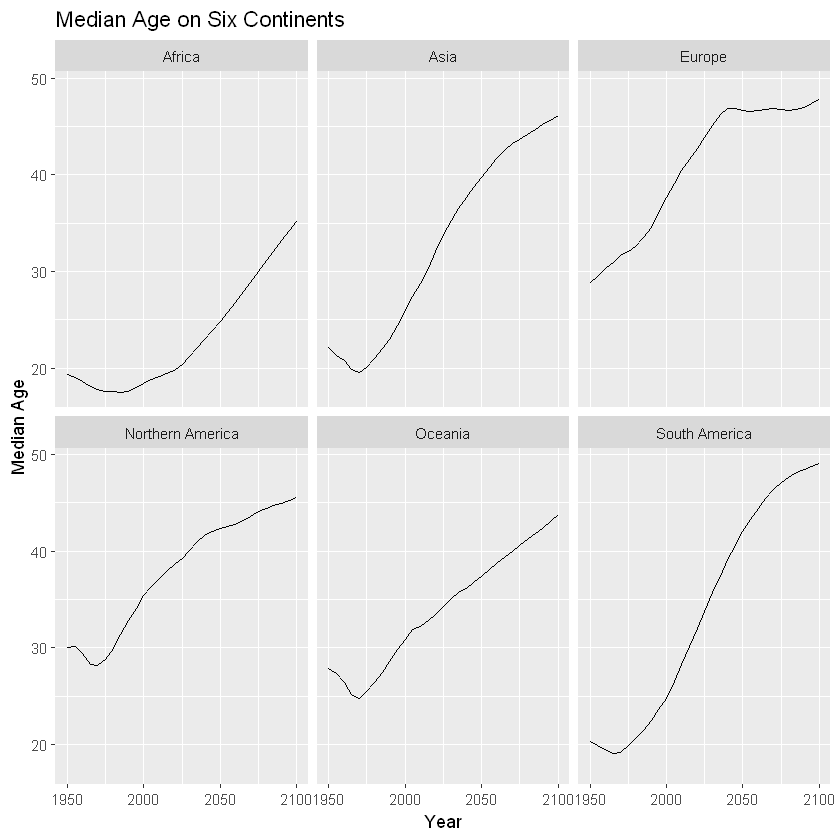

In [171]:
p + geom_line() + facet_wrap(~ Entity) +
    labs(x = "Year", y = "Median Age", title = "Median Age on Six Continents")

Let's unpack the patterns we observe:
* Median age is lowest in Africa, both at the start and end of the period.
* All continents are following the same trajectory, though Europe did not seem to experience the short-lived dip in median age that occurred in the 1970s (perhaps linked to the Vietnam war?).

Recall that the appropriate measure of association for two numeric variables is:
* *Pearson's correlation coefficient (r)*

Similar to other measures of association, it tells us the strength and direction of the association between two variables. The coefficient ranges between -1 and 1, with negative values representing negative associations, and positive values positive associations. Values closer to -1 or 1 indicate stronger associations than those closer to 0.

In [172]:
cor(continent_ages$Year, continent_ages$Age, use = "complete.obs")

[1] 0.7591108

No surprise there: the correlation coefficient indicates a strong, positive association between time and median age.

Now let's see if the association is stronger in some continents than others. From looking at the above graph, it appears that the association is weakest in Africa and strongest in Asia.

In [173]:
continent_ages_asia <- subset(continent_ages, Entity=="Asia")
continent_ages_africa <- subset(continent_ages, Entity=="Africa")
continent_ages_europe <- subset(continent_ages, Entity=="Europe")
continent_ages_namerica <- subset(continent_ages, Entity=="Northern America")
continent_ages_samerica <- subset(continent_ages, Entity=="South America")
continent_ages_oceania <- subset(continent_ages, Entity=="Oceania")

In [174]:
cor(continent_ages_asia$Year, continent_ages_asia$Age, use = "complete.obs")
cor(continent_ages_africa$Year, continent_ages_africa$Age, use = "complete.obs")
cor(continent_ages_europe$Year, continent_ages_europe$Age, use = "complete.obs")
cor(continent_ages_namerica$Year, continent_ages_namerica$Age, use = "complete.obs")
cor(continent_ages_samerica$Year, continent_ages_samerica$Age, use = "complete.obs")
cor(continent_ages_oceania$Year, continent_ages_oceania$Age, use = "complete.obs")

[1] 0.9805953

[1] 0.9225465

[1] 0.9430122

[1] 0.9713271

[1] 0.9828661

[1] 0.9831237

The association is weakest for Africa and strongest for Oceania, however there is very little variation in this association across continents.

### Three Categorical

Finally, we consider situations where we have three categorical variables. In this instance it is best to think of one of these variables as your outcome, and the other two as potential predictors / explanatory factors. This will aid your interpretation of the tables and graphs that we will produce.

Let's start with our measure of religious importance (`religimp`) and consider whether the distribution of this variable varies across two other categorical variables: age group (`agrp`) and respondent's sex (`rsex`). 

In [175]:
table(natsal$religimp)


      Very important     Fairly important   Not very important 
                 550                  935                 1102 
Not important at all         Not answered 
                1194                   18 

(You might need to re-import the *Natsal* dataset at this point - go back to the **Preliminaries** section and execute the code before returning here)

We can analyse the joint distribution with age group or sex as follows:

In [176]:
relig_age_table <- table(natsal$religimp, natsal$agrp)
round(prop.table(relig_age_table, 2)* 100, 0) # column percentages

                      
                       16-24 25-34 35-44 45-54 55-64 65-74
  Very important          10    15    14    16    19    19
  Fairly important        19    22    22    27    29    41
  Not very important      33    29    29    27    28    22
  Not important at all    38    33    35    29    23    17
  Not answered             0     1     0     1     0     1

In [177]:
relig_sex_table <- table(natsal$religimp, natsal$rsex)
round(prop.table(relig_sex_table, 2)* 100, 0) # column percentages

                      
                       Male Female
  Very important         12     16
  Fairly important       22     26
  Not very important     28     29
  Not important at all   37     28
  Not answered            1      0

It is quite simple to add an extra categorical variable to a crosstabulation; again most of the work in *R* is focused on presenting the table in a readable manner.

To help us when interpreting the table, we will define our analysis as follows:
* Is there an association between importance of religion and respondent's sex?
* Does this association vary across age groups?

In [178]:
ras_table <- table(natsal$agrp, natsal$rsex, natsal$religimp) # create crosstabulation - variable 1 is the control variable,
# variable 2 is the X (predictor) variable, variable 3 is the Y (outcome) variable.

ras_prop_table <- addmargins(prop.table(ras_table, c(1,2)), 3) # calculate proportions

ras_perc_table <- round(ftable(ras_prop_table) * 100, 0) # convert proportions to percentages

ras_perc_table # display table

              Very important Fairly important Not very important Not important at all Not answered Sum
                                                                                                      
16-24 Male                 9               19                 32                   41            0 100
      Female              11               20                 33                   36            0 100
25-34 Male                12               20                 28                   39            0 100
      Female              17               23                 29                   30            1 100
35-44 Male                10               18                 28                   44            1 100
      Female              16               25                 30                   29            0 100
45-54 Male                13               25                 26                   35            1 100
      Female              18               29                 28         

Let's unpack the above table:
* Each row represents a combination of age and sex e.g., 16-24 year old females.
* Each column represents a category of the `religimp` variable, including a final column capturing the sum of the percentages in the table.
* The numbers represent the percentage of respondents who fall into each category of the `religimp` variable, for a given combination of age and sex.

Therefore we need to compare percentages over the rows of the table. For example, we observe that 46% of females in the 65-74 age group claim religion is 'Fairly important', compared to 33% of males in the same age group.

We can compare any rows we wish, as long as it is substantively interesting of course: only 20% of females in the 16-25, compared to 46% of females in the 65-74 age group - a difference of 26 percentage points. The difference is smaller for males of the same age groups (14 percentage points).

Three-way crosstabulations are tricky to interpret, so be patient and careful when drawing conclusions from them.

**TASK**: Replace `agrp` with `ethnicgrp` in the above crosstabulation.

In [179]:
# INSERT CODE HERE

## Conclusion

In this lesson we encountered a range of techniques for summarising more than three or more variables at a time.

There is another Week 11 lesson that focuses on a range of techniques for expressing the uncertainty inherent in our quantitative analyses.

In Week 12, we bring all over our learning together to write a report based on a piece of quantitative data analysis.